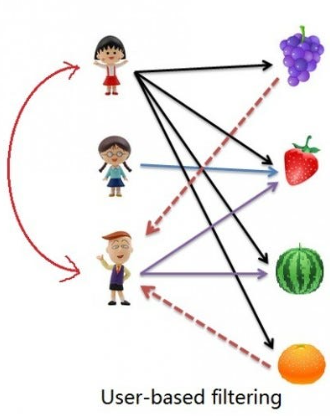

**User Based Recommendation**

User-Based Collaborative Filtering is a technique used to predict the items that a user might like on the basis of ratings given to that item by other users who have similar taste with that of the target user. Many websites use collaborative filtering for building their recommendation system.
User-Based Collaborative Filtering is a technique used to predict the items that a user might like on the basis of ratings given to that item by other users who have similar taste with that of the target user. Many websites use collaborative filtering for building their recommendation system.

**Description:**

The datasets describe ratings and free-text tagging activities from MovieLens, a movie recommendation service. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on October 17, 2016. Users were selected at random for inclusion. All selected users had rated at least 20 movies.

**Short explanation of titles from dataset:**

**rating.csv**

    movieId – unique movie number
    title – movie name
    movieId – unique movie number

**rating.csv**

    userid – unique user number
    movieId – unique movie number
    rating – the rating given to the movie by the user
    timestamp – movie release date

In [1]:
# Import libraries

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

In [2]:
# Load datasets

movie = pd.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv")
rating = pd.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv")

In [3]:
# Combine two datasets

df = movie.merge(rating, how="left", on="movieId")
df.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,2009-01-02 01:13:41


In [4]:
# Set movie unique values

df["title"].nunique()
df["title"].value_counts().head()

Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: title, dtype: int64

In [5]:
# To exclude movies with less than 1000 votes from the dataset

comment_counts = pd.DataFrame(df["title"].value_counts())
rare_movies = comment_counts[comment_counts["title"] <= 1000].index
common_movies = df[~df["title"].isin(rare_movies)]

In [6]:
# Create a pivot table for the dataframe with the userIDs in the index, the movie names in the columns, and the ratings as values

user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")
user_movie_df.head(5)

title   'burbs, The (1989)  (500) Days of Summer (2009)  *batteries not included (1987)  ...And Justice for All (1979)  10 Things I Hate About You (1999)  10,000 BC (2008)  101 Dalmatians (1996)  101 Dalmatians (One Hundred and One Dalmatians) (1961)  102 Dalmatians (2000)  12 Angry Men (1957)  12 Years a Slave (2013)  127 Hours (2010)  13 Going on 30 (2004)  13th Warrior, The (1999)  1408 (2007)  15 Minutes (2001)  16 Blocks (2006)  17 Again (2009)  1984 (Nineteen Eighty-Four) (1984)  2 Days in the Valley (1996)  2 Fast 2 Furious (Fast and the Furious 2, The) (2003)  20,000 Leagues Under the Sea (1954)  200 Cigarettes (1999)  2001: A Space Odyssey (1968)  2010: The Year We Make Contact (1984)  2012 (2009)  2046 (2004)  21 (2008)  21 Grams (2003)  21 Jump Street (2012)  24 Hour Party People (2002)  25th Hour (2002)  27 Dresses (2008)  28 Days (2000)  28 Days Later (2002)  28 Weeks Later (2007)  3 Ninjas (1992)  3-Iron (Bin-jip) (2004)  30 Days of Night (2007)  300 (2007)  3000 Miles to Graceland (2001)  39 Steps, The (1935)  3:10 to Yuma (2007)  40 Days and 40 Nights (2002)  40-Year-Old Virgin, The (2005)  400 Blows, The (Les quatre cents coups) (1959)  42 Up (1998)  48 Hrs. (1982)  50 First Dates (2004)  50/50 (2011)  54 (1998)  6th Day, The (2000)  7th Voyage of Sinbad, The (1958)  8 1/2 (8½) (1963)  8 Heads in a Duffel Bag (1997)  8 Mile (2002)  8MM (1999)  9 (2009)  9 1/2 Weeks (Nine 1/2 Weeks) (1986)  A-Team, The (2010)  A.I. Artificial Intelligence (2001)  AVP: Alien vs. Predator (2004)  AVPR: Aliens vs. Predator - Requiem (2007)  About Last Night... (1986)  About Schmidt (2002)  About a Boy (2002)  Absent-Minded Professor, The (1961)  Absolute Power (1997)  Abyss, The (1989)  Accepted (2006)  Accidental Tourist, The (1988)  Accused, The (1988)  Ace Ventura: Pet Detective (1994)  Ace Ventura: When Nature Calls (1995)  Across the Universe (2007)  Adaptation (2002)  Addams Family Values (1993)  Addams Family, The (1991)  Addicted to Love (1997)  Adjustment Bureau, The (2011)  Adventureland (2009)  Adventures in Babysitting (1987)  Adventures of Baron Munchausen, The (1988)  Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984)  Adventures of Milo and Otis, The (Koneko monogatari) (1986)  Adventures of Pinocchio, The (1996)  Adventures of Priscilla, Queen of the Desert, The (1994)  Adventures of Robin Hood, The (1938)  Adventures of Rocky and Bullwinkle, The (2000)  Adventures of Tintin, The (2011)  Aeon Flux (2005)  Affair to Remember, An (1957)  Affliction (1997)  African Queen, The (1951)  After Hours (1985)  Age of Innocence, The (1993)  Agnes of God (1985)  Aguirre: The Wrath of God (Aguirre, der Zorn Gottes) (1972)  Air America (1990)  Air Bud (1997)  Air Force One (1997)  Airheads (1994)  Airplane II: The Sequel (1982)  Airplane! (1980)  Airport (1970)  Akira (1988)  Aladdin (1992)  Aladdin and the King of Thieves (1996)  Alexander (2004)  Alfie (2004)  Ali (2001)  Alice in Wonderland (1951)  Alice in Wonderland (2010)  Alien (1979)  Alien Nation (1988)  Alien: Resurrection (1997)  Aliens (1986)  Alien³ (a.k.a. Alien 3) (1992)  Alive (1993)  All About Eve (1950)  All About My Mother (Todo sobre mi madre) (1999)  All Dogs Go to Heaven (1989)  All Dogs Go to Heaven 2 (1996)  All Quiet on the Western Front (1930)  All That Jazz (1979)  All the President's Men (1976)  All the Pretty Horses (2000)  Almost Famous (2000)  Along Came Polly (2004)  Along Came a Spider (2001)  Alphaville (Alphaville, une étrange aventure de Lemmy Caution) (1965)  Altered States (1980)  Always (1989)  Amadeus (1984)  Amateur (1994)  Amazing Spider-Man, The (2012)  Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)  America's Sweethearts (2001)  American Beauty (1999)  American Gangster (2007)  American Gigolo (1980)  American Graffiti (1973)  American History X (1998)  American Hustle (2013)  American Movie (1999)  American Pie (1999)  American Pie 2 (2001)  American President, The (1995)  American Psycho (2000)  American Splendo

In [7]:
random_user = int(pd.Series(user_movie_df.index).sample(1, random_state=45).values)
random_user

28941

In [8]:
# Creating a new dataframe named random_user_df consisting of observation units of the selected user
random_user_df = user_movie_df[user_movie_df.index == random_user]
random_user_df

title    'burbs, The (1989)  (500) Days of Summer (2009)  *batteries not included (1987)  ...And Justice for All (1979)  10 Things I Hate About You (1999)  10,000 BC (2008)  101 Dalmatians (1996)  101 Dalmatians (One Hundred and One Dalmatians) (1961)  102 Dalmatians (2000)  12 Angry Men (1957)  12 Years a Slave (2013)  127 Hours (2010)  13 Going on 30 (2004)  13th Warrior, The (1999)  1408 (2007)  15 Minutes (2001)  16 Blocks (2006)  17 Again (2009)  1984 (Nineteen Eighty-Four) (1984)  2 Days in the Valley (1996)  2 Fast 2 Furious (Fast and the Furious 2, The) (2003)  20,000 Leagues Under the Sea (1954)  200 Cigarettes (1999)  2001: A Space Odyssey (1968)  2010: The Year We Make Contact (1984)  2012 (2009)  2046 (2004)  21 (2008)  21 Grams (2003)  21 Jump Street (2012)  24 Hour Party People (2002)  25th Hour (2002)  27 Dresses (2008)  28 Days (2000)  28 Days Later (2002)  28 Weeks Later (2007)  3 Ninjas (1992)  3-Iron (Bin-jip) (2004)  30 Days of Night (2007)  300 (2007)  3000 Miles to Graceland (2001)  39 Steps, The (1935)  3:10 to Yuma (2007)  40 Days and 40 Nights (2002)  40-Year-Old Virgin, The (2005)  400 Blows, The (Les quatre cents coups) (1959)  42 Up (1998)  48 Hrs. (1982)  50 First Dates (2004)  50/50 (2011)  54 (1998)  6th Day, The (2000)  7th Voyage of Sinbad, The (1958)  8 1/2 (8½) (1963)  8 Heads in a Duffel Bag (1997)  8 Mile (2002)  8MM (1999)  9 (2009)  9 1/2 Weeks (Nine 1/2 Weeks) (1986)  A-Team, The (2010)  A.I. Artificial Intelligence (2001)  AVP: Alien vs. Predator (2004)  AVPR: Aliens vs. Predator - Requiem (2007)  About Last Night... (1986)  About Schmidt (2002)  About a Boy (2002)  Absent-Minded Professor, The (1961)  Absolute Power (1997)  Abyss, The (1989)  Accepted (2006)  Accidental Tourist, The (1988)  Accused, The (1988)  Ace Ventura: Pet Detective (1994)  Ace Ventura: When Nature Calls (1995)  Across the Universe (2007)  Adaptation (2002)  Addams Family Values (1993)  Addams Family, The (1991)  Addicted to Love (1997)  Adjustment Bureau, The (2011)  Adventureland (2009)  Adventures in Babysitting (1987)  Adventures of Baron Munchausen, The (1988)  Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984)  Adventures of Milo and Otis, The (Koneko monogatari) (1986)  Adventures of Pinocchio, The (1996)  Adventures of Priscilla, Queen of the Desert, The (1994)  Adventures of Robin Hood, The (1938)  Adventures of Rocky and Bullwinkle, The (2000)  Adventures of Tintin, The (2011)  Aeon Flux (2005)  Affair to Remember, An (1957)  Affliction (1997)  African Queen, The (1951)  After Hours (1985)  Age of Innocence, The (1993)  Agnes of God (1985)  Aguirre: The Wrath of God (Aguirre, der Zorn Gottes) (1972)  Air America (1990)  Air Bud (1997)  Air Force One (1997)  Airheads (1994)  Airplane II: The Sequel (1982)  Airplane! (1980)  Airport (1970)  Akira (1988)  Aladdin (1992)  Aladdin and the King of Thieves (1996)  Alexander (2004)  Alfie (2004)  Ali (2001)  Alice in Wonderland (1951)  Alice in Wonderland (2010)  Alien (1979)  Alien Nation (1988)  Alien: Resurrection (1997)  Aliens (1986)  Alien³ (a.k.a. Alien 3) (1992)  Alive (1993)  All About Eve (1950)  All About My Mother (Todo sobre mi madre) (1999)  All Dogs Go to Heaven (1989)  All Dogs Go to Heaven 2 (1996)  All Quiet on the Western Front (1930)  All That Jazz (1979)  All the President's Men (1976)  All the Pretty Horses (2000)  Almost Famous (2000)  Along Came Polly (2004)  Along Came a Spider (2001)  Alphaville (Alphaville, une étrange aventure de Lemmy Caution) (1965)  Altered States (1980)  Always (1989)  Amadeus (1984)  Amateur (1994)  Amazing Spider-Man, The (2012)  Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)  America's Sweethearts (2001)  American Beauty (1999)  American Gangster (2007)  American Gigolo (1980)  American Graffiti (1973)  American History X (1998)  American Hustle (2013)  American Movie (1999)  American Pie (1999)  American Pie 2 (2001)  American President, The (1995)  American Psycho (2000)  American Splend

In [9]:
# Assigning the movies that the selected user has voted to a list called movies_watched
movies_watched = random_user_df.columns[random_user_df.notna().any()].tolist()
movies_watched

['Ace Ventura: Pet Detective (1994)',
 'Ace Ventura: When Nature Calls (1995)',
 'Aladdin (1992)',
 'American President, The (1995)',
 'Apollo 13 (1995)',
 'Babe (1995)',
 'Bullets Over Broadway (1994)',
 'Clueless (1995)',
 'Disclosure (1994)',
 'Forrest Gump (1994)',
 'Four Weddings and a Funeral (1994)',
 'Home Alone (1990)',
 'Jurassic Park (1993)',
 'Like Water for Chocolate (Como agua para chocolate) (1992)',
 'Little Women (1994)',
 "Mr. Holland's Opus (1995)",
 'Mrs. Doubtfire (1993)',
 'Much Ado About Nothing (1993)',
 "Muriel's Wedding (1994)",
 'Nine Months (1995)',
 'Operation Dumbo Drop (1995)',
 'Piano, The (1993)',
 'Postman, The (Postino, Il) (1994)',
 'Ready to Wear (Pret-A-Porter) (1994)',
 'Remains of the Day, The (1993)',
 'Sabrina (1995)',
 "Schindler's List (1993)",
 'Secret Garden, The (1993)',
 'Sense and Sensibility (1995)',
 'Shadowlands (1993)',
 'Silence of the Lambs, The (1991)',
 'Star Trek: Generations (1994)',
 'Stargate (1994)']

In [10]:
# Select the columns of the movies watched by the selected user from user_movie_df and create a new dataframe named movies_watched_df
movies_watched_df = user_movie_df[movies_watched]
movies_watched_df

title,Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Aladdin (1992),"American President, The (1995)",Apollo 13 (1995),Babe (1995),Bullets Over Broadway (1994),Clueless (1995),Disclosure (1994),Forrest Gump (1994),Four Weddings and a Funeral (1994),Home Alone (1990),Jurassic Park (1993),Like Water for Chocolate (Como agua para chocolate) (1992),Little Women (1994),Mr. Holland's Opus (1995),Mrs. Doubtfire (1993),Much Ado About Nothing (1993),Muriel's Wedding (1994),Nine Months (1995),Operation Dumbo Drop (1995),"Piano, The (1993)","Postman, The (Postino, Il) (1994)",Ready to Wear (Pret-A-Porter) (1994),"Remains of the Day, The (1993)",Sabrina (1995),Schindler's List (1993),"Secret Garden, The (1993)",Sense and Sensibility (1995),Shadowlands (1993),"Silence of the Lambs, The (1991)",Star Trek: Generations (1994),Stargate (1994)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0
4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN
5.0,NaN,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,5.0,3.0,NaN,3.0,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
138490.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,5.0,NaN,NaN
138491.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Creating a new dataframe named user_movie_count with information about how many movies each user has watched

user_movie_count = movies_watched_df.T.notnull().sum()

user_movie_count = user_movie_count.reset_index()

user_movie_count.columns = ["userId", "movie_count"]

user_movie_count

,userId,movie_count
0,1.0,1
1,2.0,2
2,3.0,4
3,4.0,6
4,5.0,11
...,...,...
138488,138489.0,1
138489,138490.0,7
138490,138491.0,0
138491,138492.0,2


In [12]:
# We consider those who watch 60 percent or more of the movies voted by the selected user as similar users.

perc = len(movies_watched) * 60 / 100
users_same_movies = user_movie_count[user_movie_count["movie_count"] > perc]["userId"]
users_same_movies

90            91.0
129          130.0
155          156.0
157          158.0
159          160.0
            ...   
138207    138208.0
138278    138279.0
138381    138382.0
138414    138415.0
138482    138483.0
Name: userId, Length: 4139, dtype: float64

In [13]:
# Filter the movies_watched_df dataframe to find the ids of the users that are similar to the selected user in the user_same_movies list.
movies_watched_df = pd.concat([movies_watched_df[movies_watched_df.index.isin(users_same_movies)],
                      random_user_df[movies_watched]])
movies_watched_df

title,Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Aladdin (1992),"American President, The (1995)",Apollo 13 (1995),Babe (1995),Bullets Over Broadway (1994),Clueless (1995),Disclosure (1994),Forrest Gump (1994),Four Weddings and a Funeral (1994),Home Alone (1990),Jurassic Park (1993),Like Water for Chocolate (Como agua para chocolate) (1992),Little Women (1994),Mr. Holland's Opus (1995),Mrs. Doubtfire (1993),Much Ado About Nothing (1993),Muriel's Wedding (1994),Nine Months (1995),Operation Dumbo Drop (1995),"Piano, The (1993)","Postman, The (Postino, Il) (1994)",Ready to Wear (Pret-A-Porter) (1994),"Remains of the Day, The (1993)",Sabrina (1995),Schindler's List (1993),"Secret Garden, The (1993)",Sense and Sensibility (1995),Shadowlands (1993),"Silence of the Lambs, The (1991)",Star Trek: Generations (1994),Stargate (1994)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
91.0,2.5,2.0,NaN,4.0,3.5,NaN,NaN,NaN,NaN,4.0,4.5,3.0,3.5,NaN,3.5,3.5,4.0,4.0,3.5,2.5,2.5,NaN,NaN,NaN,NaN,2.5,4.5,NaN,NaN,NaN,3.0,3.5,4.0
130.0,4.0,3.0,NaN,3.0,3.0,NaN,NaN,3.0,5.0,5.0,5.0,3.0,4.0,3.0,NaN,4.0,4.0,NaN,3.0,NaN,NaN,4.0,4.0,NaN,3.0,NaN,5.0,NaN,NaN,3.0,5.0,NaN,3.0
156.0,3.0,NaN,NaN,5.0,5.0,3.0,NaN,NaN,4.0,5.0,3.0,4.0,5.0,NaN,NaN,4.0,5.0,4.0,3.0,3.0,4.0,5.0,NaN,NaN,NaN,4.0,5.0,NaN,4.0,4.0,5.0,3.0,4.0
158.0,2.0,1.0,4.0,4.0,3.0,5.0,NaN,4.0,NaN,5.0,4.0,3.0,3.0,NaN,NaN,3.0,3.0,NaN,5.0,3.0,3.0,NaN,5.0,NaN,5.0,3.0,5.0,5.0,4.0,5.0,5.0,NaN,NaN
160.0,NaN,NaN,3.0,5.0,4.0,4.0,NaN,3.0,2.0,5.0,5.0,4.0,4.0,NaN,4.0,NaN,4.0,3.0,NaN,3.0,NaN,3.0,NaN,NaN,5.0,NaN,5.0,NaN,NaN,5.0,4.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138279.0,3.0,NaN,NaN,3.0,5.0,5.0,5.0,4.0,NaN,5.0,4.0,2.0,5.0,5.0,5.0,4.0,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,5.0,NaN,4.0,NaN,5.0,3.0,3.0
138382.0,1.0,1.0,4.0,2.0,3.0,5.0,NaN,4.0,3.0,5.0,3.0,3.0,5.0,5.0,NaN,NaN,5.0,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,3.0,NaN,3.0,3.0,NaN,5.0,NaN,4.0
138415.0,1.0,NaN,3.0,4.0,3.0,5.0,NaN,NaN,NaN,4.0,5.0,NaN,3.0,3.0,3.0,4.0,4.0,NaN,4.0,4.0,NaN,3.0,5.0,NaN,5.0,NaN,5.0,3.0,4.0,4.0,NaN,3.0,NaN


In [14]:
# Finding correlations between users

corr_df = movies_watched_df.T.corr().unstack().sort_values().drop_duplicates()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ['user_1', 'user_2']
corr_df = corr_df.reset_index()
corr_df.head(5)

,user_1,user_2,corr
0,105664.0,78262.0,-0.954490
1,119715.0,55005.0,-0.952579
2,104652.0,137558.0,-0.950000
3,72596.0,29398.0,-0.939060
4,28866.0,67756.0,-0.936065


In [15]:
#Filtering users with high correlation (over 0.65) with the selected user

top_users = corr_df[(corr_df["user_1"] == random_user) & (corr_df["corr"] >= 0.65)][
    ["user_2", "corr"]].reset_index(drop=True)

top_users = top_users.sort_values(by='corr', ascending=False)
top_users.rename(columns={"user_2": "userId"}, inplace=True)
top_users.head(5)

,userId,corr
40,28941.0,1.000000
39,7542.0,0.772183
38,130316.0,0.758973
37,25507.0,0.752932
36,7438.0,0.752716


In [16]:
# Combining the top_users dataframe with the ratings dataset
top_users_ratings = top_users.merge(rating[["userId", "movieId", "rating"]], how='inner')
top_users_ratings = top_users_ratings[top_users_ratings["userId"] != random_user]
top_users_ratings.head(5)

,userId,corr,movieId,rating
33,7542.0,0.772183,6,3.0
34,7542.0,0.772183,10,2.0
35,7542.0,0.772183,17,4.0
36,7542.0,0.772183,19,1.0
37,7542.0,0.772183,21,3.0


In [17]:
# Multiplying the corr and rating of each user

top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']
top_users_ratings.head(10)

,userId,corr,movieId,rating,weighted_rating
33,7542.0,0.772183,6,3.0,2.316549
34,7542.0,0.772183,10,2.0,1.544366
35,7542.0,0.772183,17,4.0,3.088733
36,7542.0,0.772183,19,1.0,0.772183
37,7542.0,0.772183,21,3.0,2.316549
38,7542.0,0.772183,22,3.0,2.316549
39,7542.0,0.772183,25,4.0,3.088733
40,7542.0,0.772183,32,4.0,3.088733
41,7542.0,0.772183,34,4.0,3.088733
42,7542.0,0.772183,36,4.0,3.088733


In [18]:
# Get the average value of the weighted ratings of all users for each movie



In [19]:
recommendation_df = top_users_ratings.groupby('movieId').agg({"weighted_rating": "mean"})
recommendation_df = recommendation_df.reset_index()
recommendation_df.head(5)

,movieId,weighted_rating
0,1,2.354019
1,2,1.511405
2,3,1.763924
3,4,1.705451
4,5,1.535460


In [20]:
# Selecting movies with a rating greater than 3.5

recommendation_df= recommendation_df[recommendation_df["weighted_rating"] > 3.5]

recommendation_df["weighted_rating"].describe()

movies_recommend = recommendation_df.sort_values("weighted_rating", ascending=False).head(5)

movies_recommend.head(5)

,movieId,weighted_rating
1255,1922,3.76358
1372,2057,3.76358
1388,2077,3.76358
1699,2485,3.76358
1759,2577,3.76358


In [21]:
# Names of 5 recommended movies

recommend_5_movies = movies_recommend.merge(movie[["movieId", "title"]])
recommend_5_movies.head(5)

,movieId,weighted_rating,title
0,1922,3.76358,Whatever (1998)
1,2057,3.76358,"Incredible Journey, The (1963)"
2,2077,3.76358,"Journey of Natty Gann, The (1985)"
3,2485,3.76358,She's All That (1999)
4,2577,3.76358,Metroland (1997)
